# 2 preprocessing

# 1 шаг Установка библиотек 

In [182]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

№ 2 шаг считываем данные

In [183]:
path = "/Users/verakabanova/Desktop/Classic ML.py/_data.csv"

In [184]:
df= pd.read_csv(path)

№ 3 шаг проверяем пропущенные значения

In [185]:
print(round(df.isnull().mean() * 100, 2))

Unnamed: 0                   0.00
ID  объявления               0.00
Количество комнат            4.45
Тип                          0.00
Метро                        5.63
Адрес                        0.00
Площадь, м2                  0.00
Дом                          0.00
Парковка                    57.42
Цена                         0.00
Телефоны                     0.00
Описание                     0.00
Ремонт                      11.79
Площадь комнат, м2          38.13
Балкон                      34.14
Окна                        28.30
Санузел                     11.43
Можно с детьми/животными    26.09
Дополнительно                1.53
Название ЖК                 74.97
Серия дома                  90.74
Высота потолков, м          52.05
Лифт                        23.54
Мусоропровод                45.03
Ссылка на объявление         0.00
dtype: float64


№ 4 шаг 
 Удаляем столбцы с большим процентом пропуса ,  и столбцы не несущую информацию влияющую на стоимость
 - Название ЖК
 - Серия дома
 - Unnamed: 0 
 - Телефоны
 - Ссылка на объявление 
 - Мусоропровод
 - Описание
 - Площадь комнат

In [187]:
df.drop(columns=['Unnamed: 0', 'Телефоны','Описание','Название ЖК', 'Серия дома','Дом', 'Мусоропровод', 'Ссылка на объявление', 'Площадь комнат, м2'], axis=1, inplace=True )

- выполним проверку на дубликаты 

№ 5 шаг Приводим данные в колонках к читаемым данным 

- Обработка колонки 'Количество комнат'
  - Разделение данных (количество комнат, тип комнат) 
  - создаем два отдельных столбца 
  - Заполняем пропущенные значения по данным из столбца 'Площадь, м2'
  - Изменяем тип данных в колонке 'numbere_of_rooms' с float на int
  - Удаляем колонку Количество комнат 

In [189]:
df['Количество комнат'].value_counts()

Количество комнат
1                   7917
2, Изолированная    4623
2                   2591
3                   1717
3, Изолированная    1583
3, Оба варианта      875
4                    674
2, Смежная           637
2, Оба варианта      615
4, Оба варианта      253
5                    235
4, Изолированная     223
6                     87
3, Смежная            87
5, Оба варианта       81
5, Изолированная      47
6, Оба варианта       31
6, Изолированная      17
4, Смежная            13
1, Изолированная       8
1, Оба варианта        4
5, Смежная             4
6, Смежная             3
1, Смежная             2
Name: count, dtype: int64

In [190]:
def room(tupes):
    try:
        tupes_str = str(tupes)
        num = ''.join(filter(str.isdigit,tupes_str))
        string = ''.join(filter(lambda x: not x.isdigit(),tupes_str)).strip()
        if len(num)>0:
            return int(num), string 
        else:
            return None, tupes_str
    except ValueError:
        return None, tupes


df['numbere_of_rooms'], df['types_rooms'] = zip(*df['Количество комнат'].apply(room)) 

In [191]:
df['Площадь, м2'] = df['Площадь, м2'].astype(str).str.split('/').str[0].str.replace('.0', '')

df['Площадь, м2'] = df['Площадь, м2'].astype(float)

In [192]:
df.loc[(df['numbere_of_rooms'].isna())& (df["Площадь, м2"]< 40), 'numbere_of_rooms'] = 1
df.loc[(df['numbere_of_rooms'].isna())& (df["Площадь, м2"]>= 40) & (df["Площадь, м2"] < 60), 'numbere_of_rooms'] = 2
df.loc[(df['numbere_of_rooms'].isna())& (df["Площадь, м2"]>= 60)& (df["Площадь, м2"] < 80), 'numbere_of_rooms'] = 3
df.loc[(df['numbere_of_rooms'].isna())& (df["Площадь, м2"]>=80), 'numbere_of_rooms'] = 4

In [193]:
df['numbere_of_rooms'] = df['numbere_of_rooms'].astype(int)

In [194]:
df.drop(['Количество комнат', 'types_rooms'],axis=1, inplace= True)

- Обработка колонки Метро
 - С помощью регулярных выражений из столбца метро извлекаем название       станций и время.
 - Заполняем пропущенные значение в колонках Метро и Time_metro на основе адреса  
 - Удалили адреса находящиеся за пределами Москвы 
 - Удаляем временныее переменные 

In [195]:
import re

In [196]:
df['Time_metro'] = df['Метро'].str.extract(r'\((\d+)\s*м?и?н?у?т?')[0]
df['Time_metro'] = pd.to_numeric(df['Time_metro'], errors='coerce')

In [197]:
df.isnull().sum()

ID  объявления                  0
Тип                             0
Метро                        1315
Адрес                           0
Площадь, м2                     0
Парковка                    13417
Цена                            0
Ремонт                       2755
Балкон                       7978
Окна                         6613
Санузел                      2672
Можно с детьми/животными     6096
Дополнительно                 357
Высота потолков, м          12162
Лифт                         5500
numbere_of_rooms                0
Time_metro                   2355
dtype: int64

In [198]:
df['Метро'] = df['Метро'].str.split('(').str[0].str.replace('м.','').str.strip()

In [199]:
metro = df[df['Метро'].notna()][['Адрес','Метро','Time_metro']].drop_duplicates('Адрес')
df= df.merge(metro.rename(columns={'Метро': 'Метро_заполнение', 'Time_metro': 'Time_metro_заполнение'}), on= 'Адрес', how = 'left')

df['Метро']=df['Метро'].fillna(df['Метро_заполнение'])
df['Time_metro'] = df['Time_metro'].fillna(df['Time_metro_заполнение'])

df = df.drop(['Метро_заполнение', 'Time_metro_заполнение'], axis=1)

In [200]:
target_city = 'Москва'  
target_city_mask = df['Адрес'].str.contains(target_city, case=False, na=False)

In [201]:
df['Метро'] = df['Метро'].fillna(df['Метро'].mode()[0])

In [202]:
df['Time_metro'] = df['Time_metro'].fillna(df['Time_metro'].mode()[0])

- Заполнение пропусков в колонке Парковка 
 - заполняем часто встречаемым значением (мода)

In [203]:
df['Парковка'].value_counts()

Парковка
наземная          6043
подземная         2772
открытая          1017
многоуровневая     118
на крыше             1
Name: count, dtype: int64

In [204]:
df['Парковка'] = df['Парковка'].fillna('наземная')

- Заполнение столбца Ремонт
 - Заполняем моду 

In [205]:
df['Ремонт'].value_counts()

Ремонт
Косметический    8499
Евроремонт       8470
Дизайнерский     3474
Без ремонта       170
Name: count, dtype: int64

In [206]:
df['Ремонт'] = df['Ремонт'].fillna("Косметический")

- Заполнение столбца балкон , окна, санузел, Можно с детьми/животными, Дополнительно
Лифт  
-  заполняем модой 

In [207]:
df['Балкон'].value_counts()

Балкон
Балкон (1)                7428
Лоджия (1)                6007
Балкон (1), Лоджия (1)     716
Лоджия (2)                 568
Балкон (2)                 474
Балкон (3)                  55
Лоджия (3)                  45
Балкон (2), Лоджия (2)      25
Балкон (1), Лоджия (2)      24
Балкон (2), Лоджия (1)      20
Балкон (4)                   6
Балкон (1), Лоджия (3)       5
Балкон (3), Лоджия (1)       5
Лоджия (4)                   5
Балкон (2), Лоджия (3)       3
Балкон (1), Лоджия (4)       2
Балкон (3), Лоджия (3)       1
Балкон (4), Лоджия (4)       1
Name: count, dtype: int64

In [208]:
df['Балкон'] = df['Балкон'].fillna(df['Балкон'].mode()[0])

In [209]:
df['Окна'] = df['Окна'].fillna(df['Окна'].mode()[0])

In [210]:
df['Санузел'] = df['Санузел'].fillna(df['Санузел'].mode()[0])

In [211]:
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna(df['Можно с детьми/животными'].mode()[0])

In [212]:
df['Дополнительно'] = df['Дополнительно'].fillna(df['Дополнительно'].mode()[0])

In [213]:
df['Лифт'] = df['Лифт'].fillna(df['Лифт'].mode()[0])

- Заполнение столбца Высота потолка стандартной высотой 2,4

In [214]:
df['Высота потолков, м'] = df['Высота потолков, м'].fillna("2.4")

- Обработка колонки Цена
 - очистить колонки от лишенй информаций , оставляем только цифровую информацию о стоимости 

In [215]:
df['Цена'] = df['Цена'].str.extract(r'(\d+\.?\d*)').astype(float)

# Переименование столбцов по правилам пандас

In [ ]:
df = df.rename(columns={
    'ID  объявления': 'ad_id',
    'Тип': 'property_type',   
    'Метро': 'metro',           
    'Адрес': 'address',         
    'Площадь, м2': 'total_area',   
    'Парковка': 'parking',        
    'Цена': 'price',           
    'Ремонт': 'renovation',      
    'Площадь комнат, м2': 'rooms_area',      
    'Балкон': 'balcony',         
    'Окна': 'windows',         
    'Санузел': 'bathroom',        
    'Можно с детьми/животными': 'children_pets',   
    'Дополнительно': 'amenities',       
    'Высота потолков, м': 'ceiling_height',  
    'Лифт': 'elevator'         
})


In [217]:
df.isnull().sum()

ad_id               0
property_type       0
metro               0
address             0
total_area          0
parking             0
price               0
renovation          0
balcony             0
windows             0
bathroom            0
children_pets       0
amenities           0
ceiling_height      0
elevator            0
numbere_of_rooms    0
Time_metro          0
dtype: int64

In [220]:
df.shape

(23368, 17)

# Визуализация данных после очистки колонок 

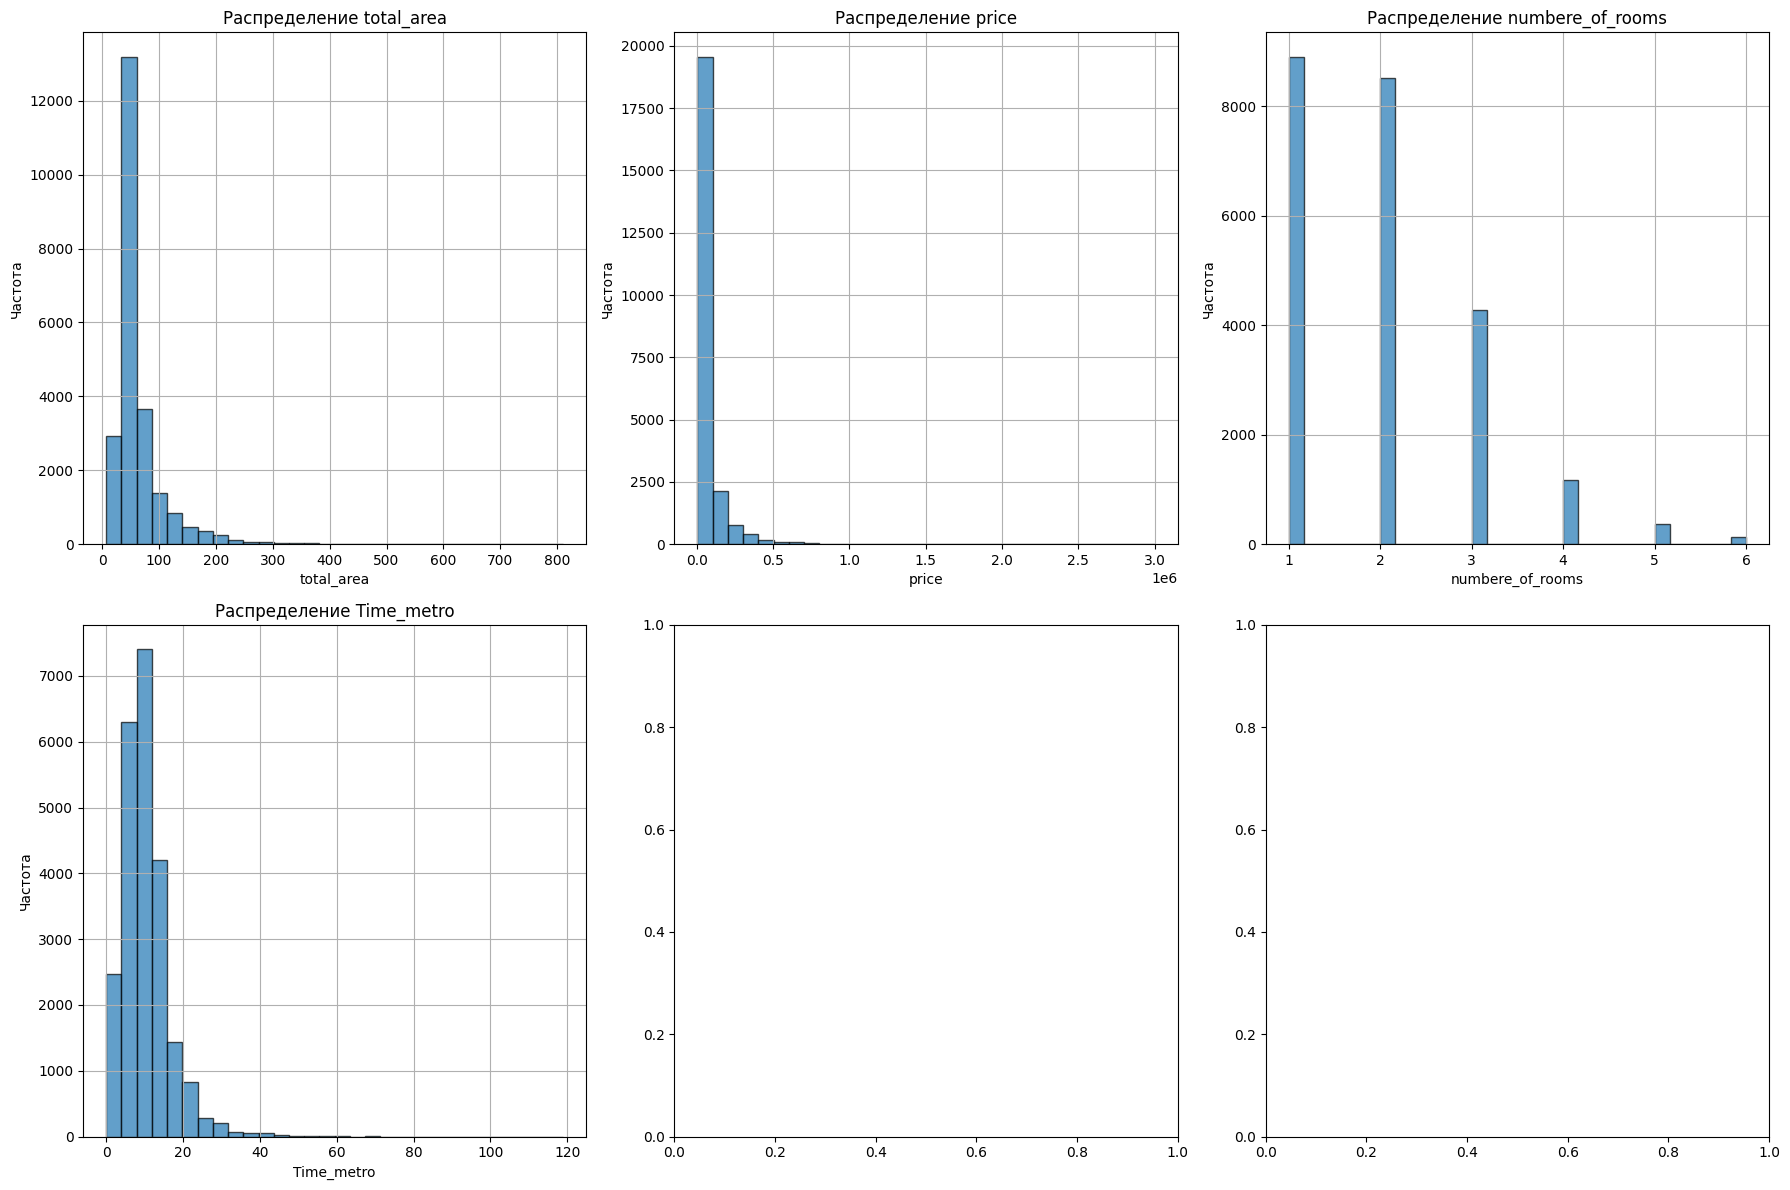

In [221]:
# Выберем числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Гистограммы для всех числовых переменных
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[1:6]):  # Первые 6 числовых колонок
    df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

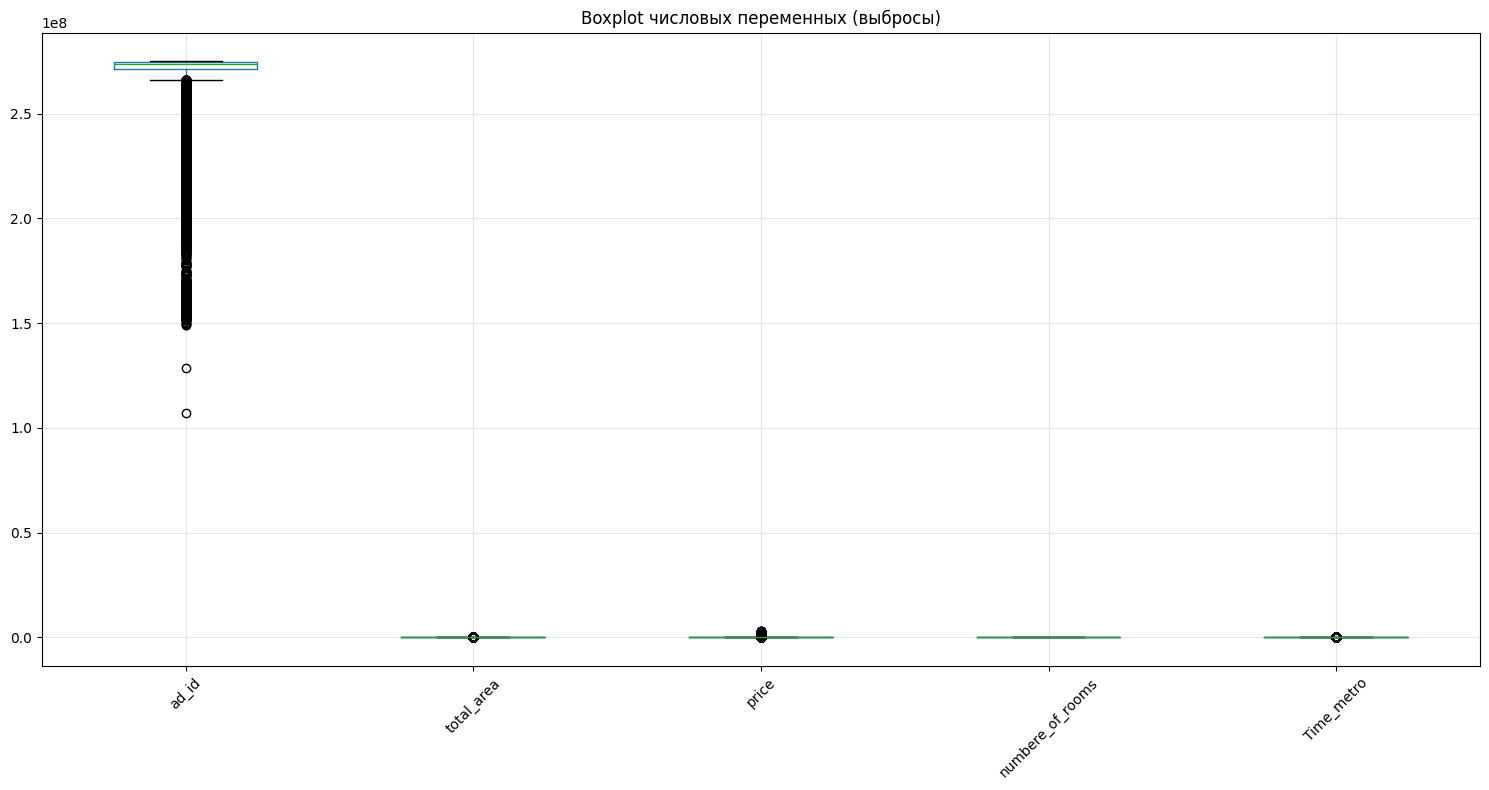

In [222]:
# Boxplot для числовых переменных
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title('Boxplot числовых переменных (выбросы)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

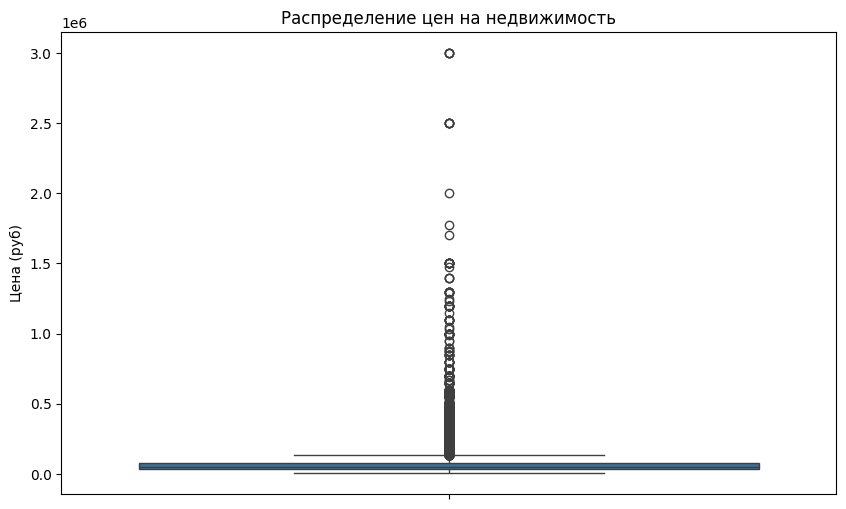

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Распределение цен на недвижимость')
plt.ylabel('Цена (руб)')
plt.show()

# Очистка дата фрейим от выбросов 

In [ ]:
def remove_outliers_iqr(df, column):
   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_clean


df_clean = remove_outliers_iqr(df, 'price')

In [229]:
df_clean = remove_outliers_iqr(df, 'price')

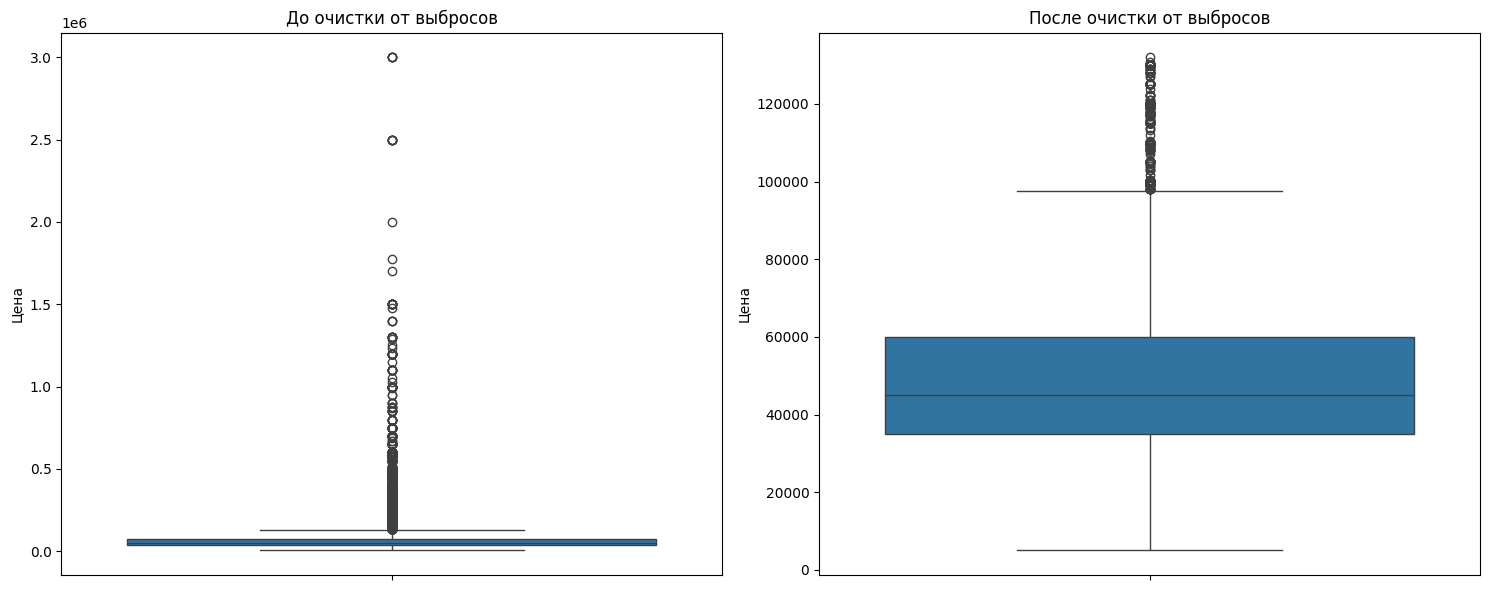

Статистика ДО очистки:
count    2.336800e+04
mean     8.289414e+04
std      1.226962e+05
min      5.000000e+03
25%      3.700000e+04
50%      4.950000e+04
75%      7.500000e+04
max      3.000000e+06
Name: price, dtype: float64

Статистика ПОСЛЕ очистки:
count     20455.000000
mean      51172.458445
std       23217.145042
min        5000.000000
25%       35000.000000
50%       45000.000000
75%       60000.000000
max      132000.000000
Name: price, dtype: float64


In [230]:
def compare_before_after(df, df_clean, column):
    """
    Сравнивает распределение до и после удаления выбросов
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # До очистки
    sns.boxplot(y=df[column], ax=ax1)
    ax1.set_title('До очистки от выбросов')
    ax1.set_ylabel('Цена')
    
    # После очистки
    sns.boxplot(y=df_clean[column], ax=ax2)
    ax2.set_title('После очистки от выбросов')
    ax2.set_ylabel('Цена')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print("Статистика ДО очистки:")
    print(df[column].describe())
    print("\nСтатистика ПОСЛЕ очистки:")
    print(df_clean[column].describe())

# Сначала очищаем
df_clean = remove_outliers_iqr(df, 'price')
# Потом сравниваем
compare_before_after(df, df_clean, 'price')

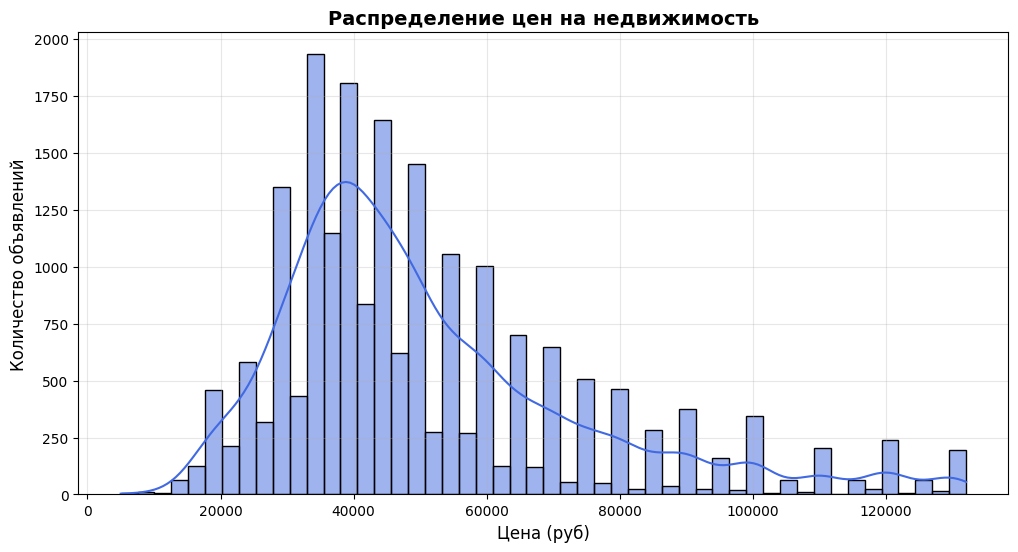

In [231]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='price', bins=50, kde=True, color='royalblue')
plt.title('Распределение цен на недвижимость', fontsize=14, fontweight='bold')
plt.xlabel('Цена (руб)', fontsize=12)
plt.ylabel('Количество объявлений', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

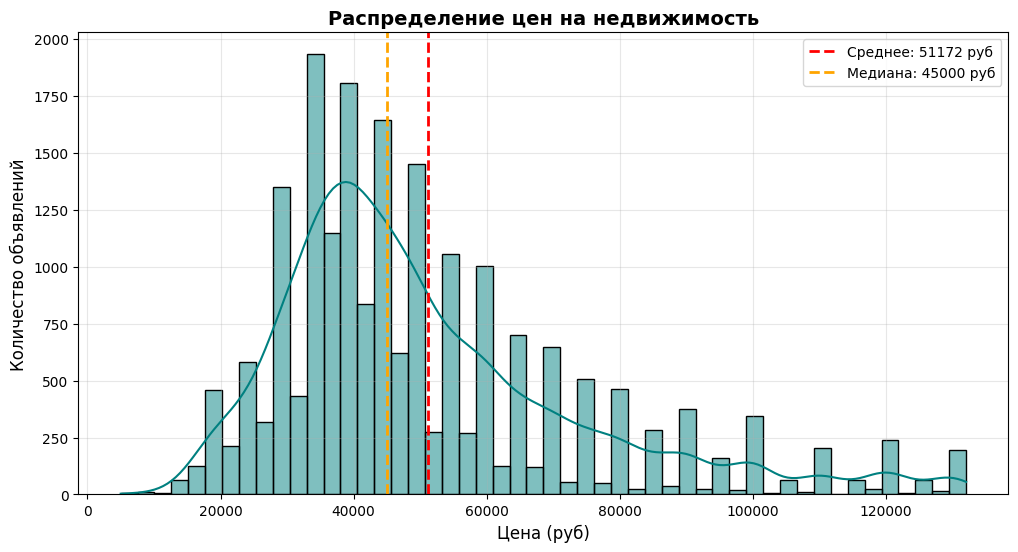

In [232]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='price', bins=50, kde=True, color='teal')

# Добавляем линии статистик
stats = df_clean['price'].describe()
plt.axvline(stats['mean'], color='red', linestyle='--', linewidth=2, label=f'Среднее: {stats["mean"]:.0f} руб')
plt.axvline(stats['50%'], color='orange', linestyle='--', linewidth=2, label=f'Медиана: {stats["50%"]:.0f} руб')

plt.title('Распределение цен на недвижимость', fontsize=14, fontweight='bold')
plt.xlabel('Цена (руб)', fontsize=12)
plt.ylabel('Количество объявлений', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [233]:
df_clean.to_csv('cleaned_real_estate.csv', index=False, encoding='utf-8-sig')
print(f"Датафрейм сохранен! Размер: {df_clean.shape}")

Датафрейм сохранен! Размер: (20455, 17)
